In [1]:
import matplotlib.pyplot as plt
from q_learning.algorithm import QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd


In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_aeq-20bits2', 'model_final_h20bits2', 'model_h_c-20bits2']
experiment_id = '143631'
experiment_type = 'mb_q_learning'
model_files = {model_name: glob(f'tmp/{experiment_type}/{experiment_id}/{model_name}/*' ) for model_name in model_names}
policy_class = QLPolicy


Tag: tmp/mb_q_learning/633045/model_h_c-20bits/x_interval_policy
Episode 9 Reward: -236.27558804609703 || New State Found: True


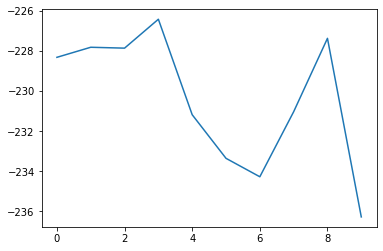

Reward Mean: -230.3904048130129
Reward std : 3.189489865755925


In [4]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

benchmarks = {}
evaluators = []
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = policy_class.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs, tag=policy_file.split('.')[0])
        evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

In [5]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

,reward,std
tmp/mb_q_learning/633045/model_aeq-20bits/best_policy,-202.680205,5.029308
tmp/mb_q_learning/633045/model_aeq-20bits/last_save_policy,-192.937841,1.106666
tmp/mb_q_learning/633045/model_aeq-20bits/x_interval_policy,-193.425823,0.813873
tmp/mb_q_learning/633045/model_final_h20bits/best_policy,-203.029531,0.407745
tmp/mb_q_learning/633045/model_final_h20bits/last_save_policy,-203.212953,0.408764
tmp/mb_q_learning/633045/model_final_h20bits/x_interval_policy,-203.334003,0.364738
tmp/mb_q_learning/633045/model_h_c-20bits/best_policy,-229.825549,2.903773
tmp/mb_q_learning/633045/model_h_c-20bits/last_save_policy,-231.747810,4.386913
tmp/mb_q_learning/633045/model_h_c-20bits/x_interval_policy,-230.390405,3.189490


In [6]:
model_files

{'model_aeq-20bits': ['tmp/mb_q_learning/633045/model_aeq-20bits/best_policy.pkl',
  'tmp/mb_q_learning/633045/model_aeq-20bits/last_save_policy.pkl',
  'tmp/mb_q_learning/633045/model_aeq-20bits/x_interval_policy.pkl'],
 'model_final_h20bits': ['tmp/mb_q_learning/633045/model_final_h20bits/best_policy.pkl',
  'tmp/mb_q_learning/633045/model_final_h20bits/last_save_policy.pkl',
  'tmp/mb_q_learning/633045/model_final_h20bits/x_interval_policy.pkl'],
 'model_h_c-20bits': ['tmp/mb_q_learning/633045/model_h_c-20bits/best_policy.pkl',
  'tmp/mb_q_learning/633045/model_h_c-20bits/last_save_policy.pkl',
  'tmp/mb_q_learning/633045/model_h_c-20bits/x_interval_policy.pkl']}